<a href="https://colab.research.google.com/github/positivezenart/Exploratory-data-analysis/blob/main/Haberman's_survival.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


**EXPLORATORY DATA ANALYSIS ON HABERMAN'S CANCER SURVIVAL DATA SET**
**Haberman’s Survival Data set .**

The dataset contains cases from a study that was conducted between 1958 and 1970 at the University of Chicago’s Billings Hospital on the survival of patients who had undergone surgery for breast cancer.


The various attributes of the data set are:

1.Age of patient at the time of operation(numerical)

2.Patient’s year of operation (year between 1958 to 1970, numerical)

3.Number of positive axillary nodes detected (numerical)

4.Survival status (class attribute) denoted as:

    1 — if the patient survived 5 years or longer

    2 — if the patient died within 5 years


**Objective**

To perform exploratory data analysis to determine whether a patient will survive for 5 year or longer based on the attributes.

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


** Observation**
1. Data set has 305 rows, 4 columns

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

haber_man = pd.read_csv("/content/drive/My Drive/haberman.csv") #reading CSV file as dataframe
haber_man.columns = ["age","year","node","status"] # assigning a text name to 4 columns
haber_man

,age,year,node,status
0,30,62,3,1
1,30,65,0,1
2,31,59,2,1
3,31,65,4,1
4,33,58,10,1
...,...,...,...,...
300,75,62,1,1
301,76,67,0,1
302,77,65,3,1
303,78,65,1,2


In [ ]:
print(haber_man.shape) #calculate the shapes and columns, 350 rows, 4 features

(305, 4)


In [ ]:
haber_man.columns = ["age","year","node","status"] # assigning a text name to 4 columns
print(haber_man.columns)


Index(['age', 'year', 'node', 'status'], dtype='object')


**Observation**

1. Data set has four attributes
2. Attributes are Age, Year, Node , Status

In [ ]:
haber_man["status"].value_counts()
#Haber_man is a imbalanced dataset as the Yes class is 224, and No class is 81

1    224
2     81
Name: status, dtype: int64

**Observation**
1. Dataset is a imbalanced dataset as 1 class data points is higher than 2 class data points.
2. patient survived 5 years or longer is 224, the patient died within 5 years 81
3. There are only two class objects in the status attriubute

#2d Scatter plot

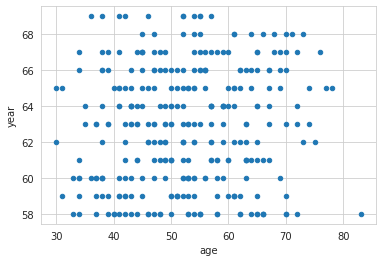

In [ ]:
haber_man.plot(kind='scatter',x="age",y="year");
plt.show()

**Observation**
1. Based on the above graph we will not be able to determine whether a patient will survive for 5 year or longer based on the attributes.
2. cannot make much sense out it.

/usr/local/lib/python3.7/dist-packages/seaborn/axisgrid.py:337: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


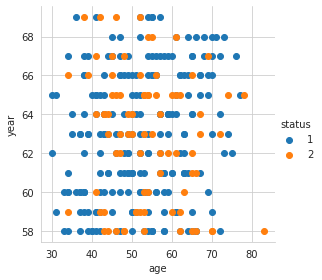

In [ ]:
# Creating 2D scatter plots for attributes age and year in respect to status.

sns.set_style("whitegrid");
sns.FacetGrid(haber_man, hue="status", size=4) \
    .map(plt.scatter, "age", "year") \
    .add_legend();
plt.show();

**Observation**
1. People with age between 30 and 40 operated in 1958,1959,1960,1961,1962,1963,1964,1965,1967 is survived.
2. However determining the survival rate above 40 years is difficult using 2d Scatter plot

/usr/local/lib/python3.7/dist-packages/seaborn/axisgrid.py:337: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


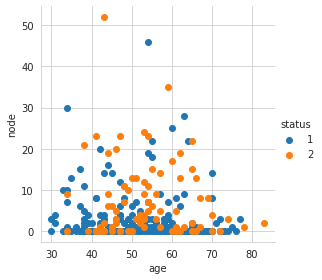

In [ ]:
# Creating 2D scatter plots for attributes age and nodes in respect to status.

sns.set_style("whitegrid");
sns.FacetGrid(haber_man, hue="status", size=4) \
    .map(plt.scatter, "age", "node") \
    .add_legend();
plt.show();


**Observation**
1. The datapoints are randomly scattered and overlapped, Using the scatter plot with age and node class labels we will not be able to seprate the data points to derive any insight

/usr/local/lib/python3.7/dist-packages/seaborn/axisgrid.py:337: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


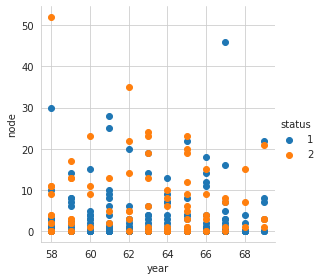

In [ ]:
# Creating 2D scatter plots for attributes Year and node in respect to status.
sns.set_style('whitegrid');
sns.FacetGrid(haber_man,hue="status", size=4) \
    .map(plt.scatter, "year", "node") \
    .add_legend();
plt.show()
 

**Observation**

The datapoints are randomly scattered and overlapped, Using the scatter plot with age and node class lebels we will not be able to seprate the data points to derive any insight



**Final Observation**
 
1. Based on the observation of three seprate 2d scatter plots for different clas labels, We can conlcude that 2d scatter plots is not suiificent to meet our objective
2. Using "Age" and "year as feature we can draw insight for 30 to 40 year old people surival years

**Pair-plot** 

/usr/local/lib/python3.7/dist-packages/seaborn/axisgrid.py:2076: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


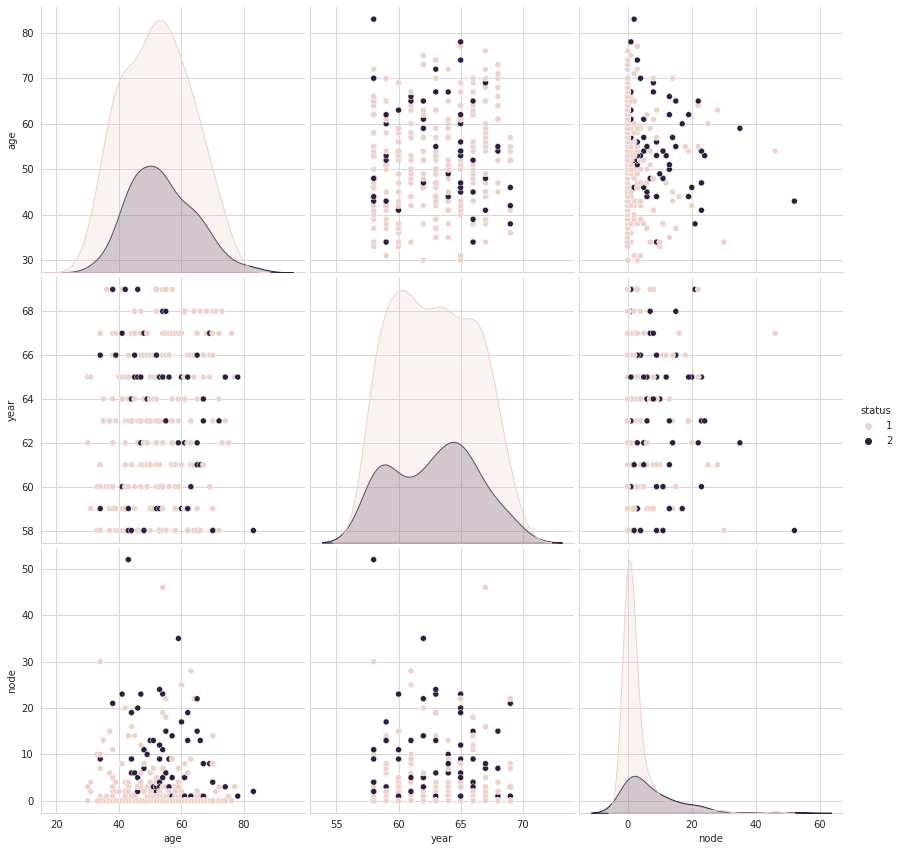

In [ ]:
plt.close();
sns.set_style('whitegrid');
sns.pairplot(haber_man, hue= 'status',size=4);
plt.show()

**Observation**
1. Datapoints are overlapping, its difficult to derive the insight from pair plots which is same as 2d scatter plot
2. 

In [ ]:
#1-D scatter plot of age
haber_1 = haber_man.loc[haber_man["status"]== 1];# it will store data in haber_1 in data frame
haber_2 = haber_man.loc[haber_man["status"]== 2];



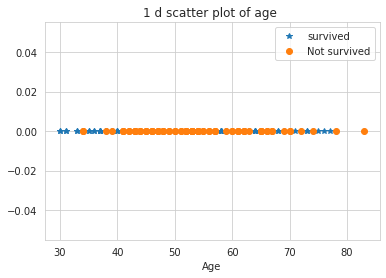

In [ ]:
plt.plot(haber_1["age"],np.zeros_like(haber_1["age"]), '*',label='survived')
plt.plot(haber_2["age"],np.zeros_like(haber_2["age"]), 'o',label='Not survived')
plt.title("1 d scatter plot of age ")
plt.xlabel("Age")
plt.legend()
plt.show()

**Observation**
1. patient with age less than 33 survived
2. deriving the survival insight is futile since there is extreme overplap of data.


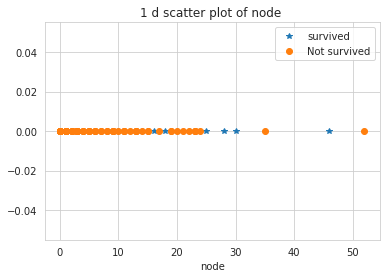

In [ ]:
plt.plot(haber_1["node"],np.zeros_like(haber_1["node"]), '*',label='survived')
plt.plot(haber_2["node"],np.zeros_like(haber_2["node"]), 'o',label='Not survived')
plt.title("1 d scatter plot of node ")
plt.xlabel("node")
plt.legend()
plt.show()

**Observation**
1. High overlaping of data


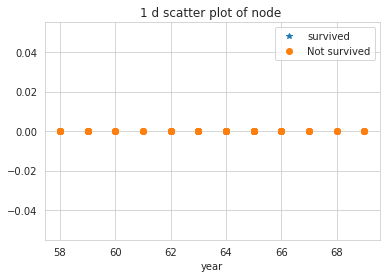

In [ ]:
plt.plot(haber_1["year"],np.zeros_like(haber_1["year"]), '*',label='survived')
plt.plot(haber_2["year"],np.zeros_like(haber_2["year"]), 'o',label='Not survived')
plt.title("1 d scatter plot of node ")
plt.xlabel("year")
plt.legend()
plt.show()

**Observation**
1. High overlaping of data

**Final Observation**
1. Since we cant derive any useful insight from 1d scatter plot, We will use histogram to visualize 1d scatter plot to find the useful feature

/usr/local/lib/python3.7/dist-packages/seaborn/axisgrid.py:337: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


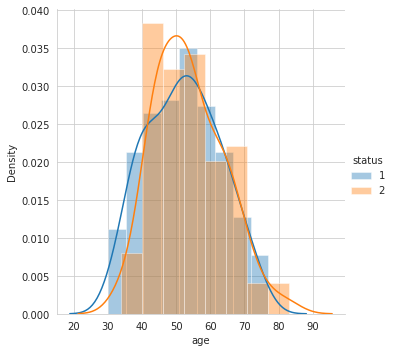

In [ ]:
sns.FacetGrid(haber_man, hue="status", size=5) \
    .map(sns.distplot, "age") \
    .add_legend();
plt.show()

**Observation**
1. People with age<35 surivival rate is high
2. people with age >85 the survival rate is zero
3. People with age>35 and age<75 survival rate is 50-50

/usr/local/lib/python3.7/dist-packages/seaborn/axisgrid.py:337: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


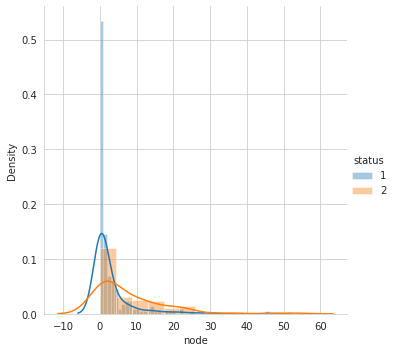

In [ ]:
sns.FacetGrid(haber_man, hue="status", size=5) \
    .map(sns.distplot, "node") \
    .add_legend();
plt.show()

Observation
1. People with node 0 have high probablity of surival
2. As node increase probabality of people surival decreases

/usr/local/lib/python3.7/dist-packages/seaborn/axisgrid.py:337: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


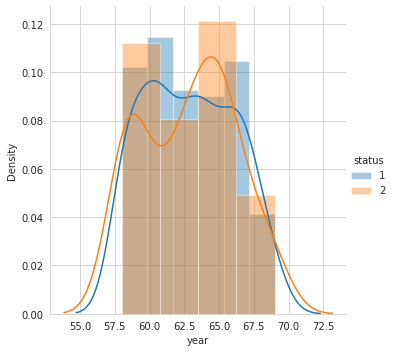

In [ ]:
sns.FacetGrid(haber_man, hue="status", size=5) \
    .map(sns.distplot, "year") \
    .add_legend();
plt.show()

**Observation**
1. Surgery conducted on 1960 have higher survival rate compared to 1965
2. Since Data overlap, Insight derived are not consistent. 

**Final observation**
1. Feature "Age" is better option to derive insight compared to node and year feature

[0.04910714 0.10714286 0.125      0.09375    0.16517857 0.16517857
 0.09375    0.11160714 0.0625     0.02678571]
[30.  34.7 39.4 44.1 48.8 53.5 58.2 62.9 67.6 72.3 77. ]


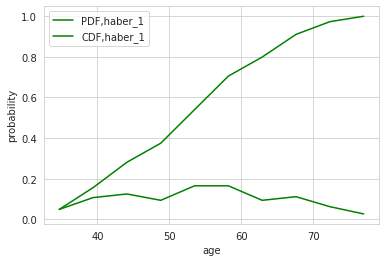

In [ ]:
counts, bin_edges = np.histogram(haber_1["age"], bins=10, 
                                 density = True)
pdf = counts/(sum(counts))
print(pdf);
print(bin_edges);
cdf = np.cumsum(pdf) 
plt.plot(bin_edges[1:],pdf,color="green",label= "PDF,haber_1");
plt.plot(bin_edges[1:],cdf,color="green",label= "CDF,haber_1");
plt.xlabel("age")
plt.ylabel("probability")
plt.legend()



[0.03703704 0.12345679 0.19753086 0.19753086 0.13580247 0.12345679
 0.09876543 0.04938272 0.02469136 0.01234568]
[34.  38.9 43.8 48.7 53.6 58.5 63.4 68.3 73.2 78.1 83. ]


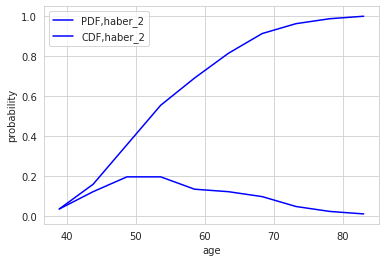

In [ ]:
counts, bin_edges = np.histogram(haber_2["age"], bins=10, 
                                 density = True)
pdf = counts/(sum(counts))
print(pdf);
print(bin_edges);
cdf = np.cumsum(pdf)
plt.plot(bin_edges[1:],pdf,color="blue",label= "PDF,haber_2");
plt.plot(bin_edges[1:],cdf,color="blue",label= "CDF,haber_2");
plt.xlabel("age")
plt.ylabel("probability")
plt.legend()

[0.04910714 0.10714286 0.125      0.09375    0.16517857 0.16517857
 0.09375    0.11160714 0.0625     0.02678571]
[30.  34.7 39.4 44.1 48.8 53.5 58.2 62.9 67.6 72.3 77. ]
[0.03703704 0.12345679 0.19753086 0.19753086 0.13580247 0.12345679
 0.09876543 0.04938272 0.02469136 0.01234568]
[34.  38.9 43.8 48.7 53.6 58.5 63.4 68.3 73.2 78.1 83. ]


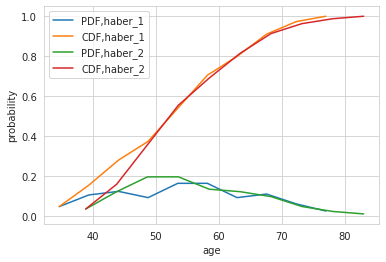

In [ ]:
counts, bin_edges = np.histogram(haber_1["age"], bins=10, 
                                 density = True)
pdf = counts/(sum(counts))
print(pdf);
print(bin_edges);
cdf = np.cumsum(pdf)
plt.plot(bin_edges[1:],pdf,label= "PDF,haber_1");
plt.plot(bin_edges[1:],cdf,label= "CDF,haber_1");

counts, bin_edges = np.histogram(haber_2["age"], bins=10, 
                                 density = True)
pdf = counts/(sum(counts))
print(pdf);
print(bin_edges);
cdf = np.cumsum(pdf)
plt.plot(bin_edges[1:],pdf,label= "PDF,haber_2");
plt.plot(bin_edges[1:],cdf,label= "CDF,haber_2");

plt.xlabel("age")
plt.ylabel("probability")
plt.legend()

**Observation**
1. Between the age 38 to 42 survival rate is significantly higher than no surival rate. Since there is a less overlap and almost 20% of surviovrs comes from 38-42 age carefory
2. Betweemn 75 -80 age, Surival rate is significantly lower and its almost zero.

[0.1875     0.10714286 0.10267857 0.07142857 0.09821429 0.09821429
 0.06696429 0.09821429 0.09375    0.07589286]
[58.  59.1 60.2 61.3 62.4 63.5 64.6 65.7 66.8 67.9 69. ]
[0.25925926 0.04938272 0.03703704 0.08641975 0.09876543 0.09876543
 0.16049383 0.07407407 0.04938272 0.08641975]
[58.  59.1 60.2 61.3 62.4 63.5 64.6 65.7 66.8 67.9 69. ]


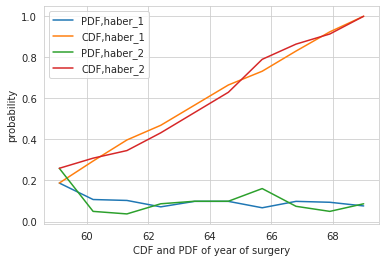

In [ ]:
counts, bin_edges = np.histogram(haber_1["year"], bins=10, 
                                 density = True)
pdf = counts/(sum(counts))
print(pdf);
print(bin_edges);
cdf = np.cumsum(pdf)
plt.plot(bin_edges[1:],pdf,label= "PDF,haber_1");
plt.plot(bin_edges[1:],cdf,label= "CDF,haber_1");

counts, bin_edges = np.histogram(haber_2["year"], bins=10, 
                                 density = True)
pdf = counts/(sum(counts))
print(pdf);
print(bin_edges);
cdf = np.cumsum(pdf)
plt.plot(bin_edges[1:],pdf,label= "PDF,haber_2");
plt.plot(bin_edges[1:],cdf,label= "CDF,haber_2");

plt.xlabel("CDF and PDF of year of surgery")
plt.ylabel("probability")
plt.legend()

**Observation**
1. Between 1965 to 1967 surival rate is significantly lower than the survival rate
2. between 1962 to 1965 percentage of surival rate is almost similar to non surival rate

[0.83482143 0.08035714 0.02232143 0.02678571 0.01785714 0.00446429
 0.00892857 0.         0.         0.00446429]
[ 0.   4.6  9.2 13.8 18.4 23.  27.6 32.2 36.8 41.4 46. ]
[0.56790123 0.14814815 0.13580247 0.04938272 0.07407407 0.
 0.01234568 0.         0.         0.01234568]
[ 0.   5.2 10.4 15.6 20.8 26.  31.2 36.4 41.6 46.8 52. ]


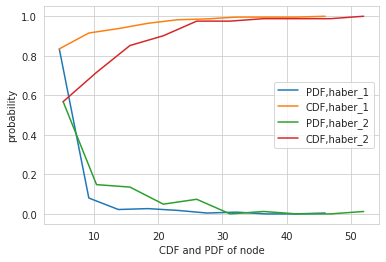

In [ ]:
counts, bin_edges = np.histogram(haber_1["node"], bins=10, 
                                 density = True)
pdf = counts/(sum(counts))
print(pdf);
print(bin_edges);
cdf = np.cumsum(pdf)
plt.plot(bin_edges[1:],pdf,label= "PDF,haber_1");
plt.plot(bin_edges[1:],cdf,label= "CDF,haber_1");

counts, bin_edges = np.histogram(haber_2["node"], bins=10, 
                                 density = True)
pdf = counts/(sum(counts))
print(pdf);
print(bin_edges);
cdf = np.cumsum(pdf)
plt.plot(bin_edges[1:],pdf,label= "PDF,haber_2");
plt.plot(bin_edges[1:],cdf,label= "CDF,haber_2");

plt.xlabel("CDF and PDF of node")
plt.ylabel("probability")
plt.legend()

**Observation**
1. People with less than 10 node have surival rate of 90%
2. Its extremly difficult to derive any valuble insight from using node as feature

**Mean, Variance and Std-dev**

In [ ]:
haber_1.describe()

,age,year,node,status
count,224.000000,224.000000,224.000000,224.0
mean,52.116071,62.857143,2.799107,1.0
std,10.937446,3.229231,5.882237,0.0
min,30.000000,58.000000,0.000000,1.0
25%,43.000000,60.000000,0.000000,1.0
50%,52.000000,63.000000,0.000000,1.0
75%,60.000000,66.000000,3.000000,1.0
max,77.000000,69.000000,46.000000,1.0


**Observation**
1. Avergage age of people who surived after surgery is 52.116071
2. 75 % of surival rate is below the age of 60
3. 50% of surivial rate is below the age of 52
4. Minimum age of survived person is 30
5. Maximum age of survived person is 77


In [ ]:
haber_2.describe()

,age,year,node,status
count,81.000000,81.000000,81.000000,81.0
mean,53.679012,62.827160,7.456790,2.0
std,10.167137,3.342118,9.185654,0.0
min,34.000000,58.000000,0.000000,2.0
25%,46.000000,59.000000,1.000000,2.0
50%,53.000000,63.000000,4.000000,2.0
75%,61.000000,65.000000,11.000000,2.0
max,83.000000,69.000000,52.000000,2.0


**Observation**
1. Average age of people who didnt survive after surgery is 53.679012
2. 75 % of no-surival rate is below the age of 61
3. 50% of no-surivial rate is below the age of 53
4. Minimum age of non- survived person is 34
5. Maximum age of non-survived person is 83

**Box Plot**

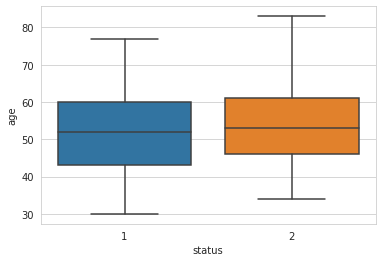

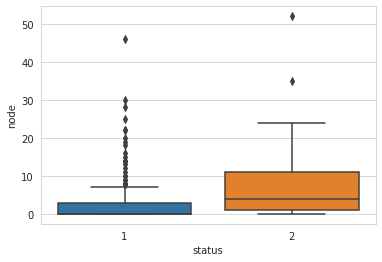

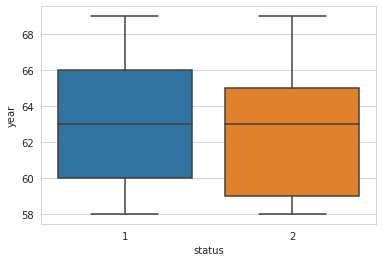

In [ ]:
#box plot for feature age
sns.boxplot(x='status',y='age',data=haber_man)
plt.show()
sns.boxplot(x='status',y='node',data=haber_man)
plt.show()
sns.boxplot(x='status',y='year',data=haber_man) 
plt.show()

**Observation**
1. 50% of the surviers comes below the age of 52
2. 75% of the survivers comes below the age of 60
3. 25% of the survivers comes below the age of 44

 **Violin** **plots** 

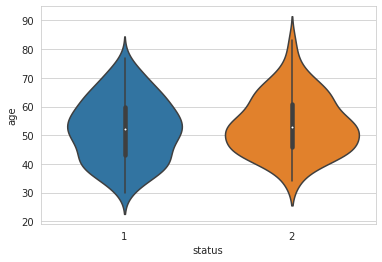

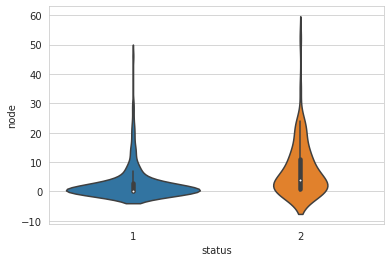

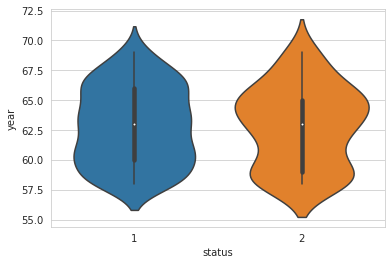

In [ ]:
#Violin plot for feature age
sns.violinplot(x='status',y='age',data=haber_man,size=8)
plt.show()
sns.violinplot(x='status',y='node',data=haber_man,size=8)
plt.show()
sns.violinplot(x='status',y='year',data=haber_man,size=8)
plt.show()

**Observation**

1.Survival rate in age varies from 25 to 85 aproximately.

2.75 % of the  survivors are below the age of 60.                                          
3.Most  survivors comes between the age of 45 to 
60                                                                
4.Between 85 to 90 age, Surival is null.

**Contour** **plot**

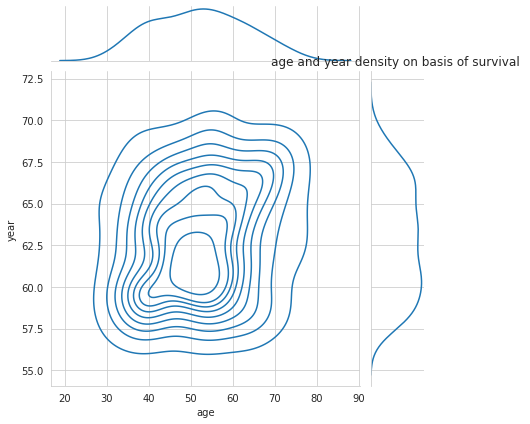

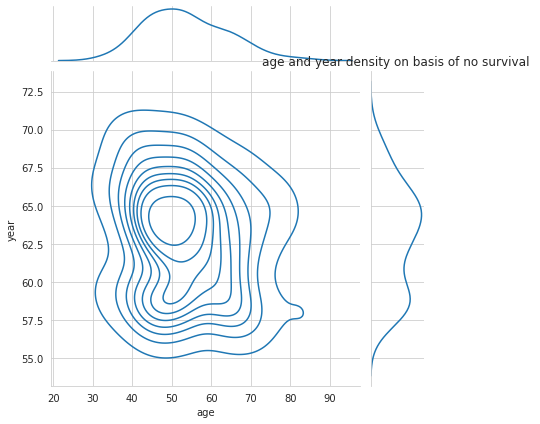

In [ ]:
sns.jointplot(x="age", y="year", data=haber_1, kind="kde");
plt.title("age and year density on basis of survival ")
plt.show();
sns.jointplot(x="age", y="year", data=haber_2, kind="kde");
plt.title("age and year density on basis of no survival ")
plt.show();

**Observation**
1. Between 1960 to 1963, we could observe the highest survival rate for the age between 45 to 55
2.Between 1963 to 1966, we could observe the highest no surival rate between the age group 43 to 55

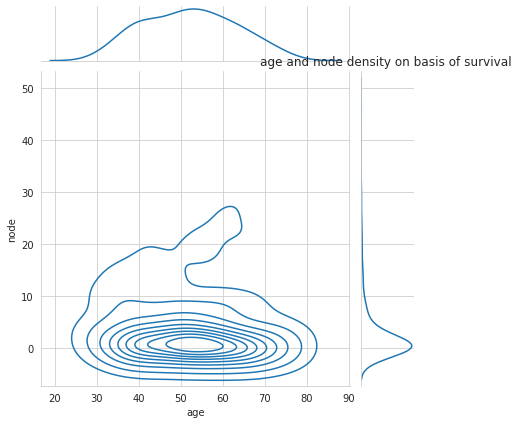

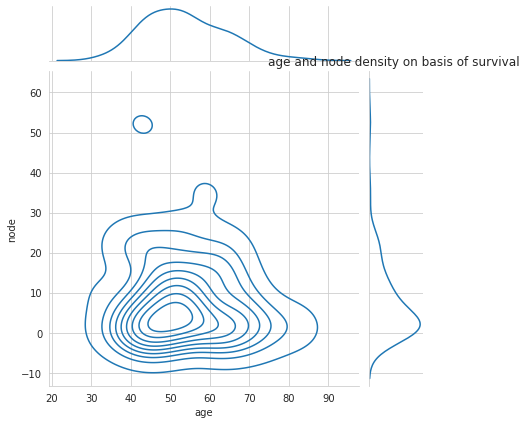

In [ ]:
sns.jointplot(x="age", y="node", data=haber_1, kind="kde");
plt.title("age and node density on basis of survival ")
plt.show();
sns.jointplot(x="age", y="node", data=haber_2, kind="kde");
plt.title("age and node density on basis of survival ")
plt.show();

Observation
1. Survival is higher for the age group 45-55 and node counts equal to 0
2. Node count more than 20 have less chance of survival
3. Node count more than 30 have no chance of survival
4. Survival rate of age group between 45 to 55 is significantly less for the node less than 10

**Final Observation**



*  People with age between 30 and 40 operated in 1958,1959,1960,1961,1962,1963,1964,1965,1967 is survived.
*   People with node 0 have high probablity of surival


*   Feature "Age" is better option to derive insight compared to node and year feature
*   Between the age 38 to 42 survival rate is significantly higher than no surival rate. Since there is a less overlap and almost 20% of surviovrs comes from 38-42 age carefory


*  Avergage age of people who surived after surgery is 52.116071
 

*   75 % of surival rate is below the age of 60
*   50% of surivial rate is below the age of 52

*   Minimum age of survived person is 30
*   Maximum age of survived person is 77


*   3.Most  survivors comes between the age of 45 to 
60                                                                
*  Between 85 to 90 age, Surival is null












